<a href="https://colab.research.google.com/github/jieun0441/Stimulus-Payment/blob/main/SP_Simulation_ver1122_2019distribution_avg_NS_Tij_Tji_%EA%B2%B0%EC%B8%A1%EC%9D%80_%EC%A0%9C%EC%99%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### data load & Setting

In [1]:
# For Colab Use
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Package loading
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
# data load for regression
data = pd.read_stata("/content/drive/MyDrive/SP/Table for Regression_20241103.dta")

In [4]:
# data to calculate X vars
# SWMxinf_S
SWMxinf_S = pd.read_excel('/content/drive/MyDrive/SP/SWMxinf_from_Seoul.xlsx') # 유동인구 from Seoul to Seoul
# SWMxinf_NS
SWMxinf_NS = pd.read_excel('/content/drive/MyDrive/SP/SWMxinf_from_nonSeoul.xlsx') # 유동인구 from 비서울 to Seoul

In [5]:
# Card with Restrictions
Card = pd.read_stata('/content/drive/MyDrive/SP/Simulation_1103/All_OD_Cards_from_week19_to_35_880328.dta')

In [6]:
Card.columns

Index(['v1', 'week', 'orig_sido', 'dest_sido', 'orig', 'dest', 'OD', 'week_OD',
       'num_total', '_merge_num_total', 'avg1017_8', '_merge_avg1017_8',
       'netCard', 'orig_inf', 'week_area', 'dest_inf', '_merge',
       'netCardxorig_inf', 'netCardxdest_inf', 'week_dest', 'week_orig',
       'ratio19_weekt_comp_to_1017', '_merge_ratio19', 'avg1017_8xratio_19',
       'netCard_r19', 'netCard_r19xorig_inf', 'netCard_r19xdest_inf'],
      dtype='object')

In [29]:
# Card without Restrictions
### netCard_woR of Seoul residents
#Card_wo_S = pd.read_stata("/content/drive/MyDrive/SP/Simulation_1112_2019distribution/AllOD_2019_and_week1017_in_2020_netCard_woR of Seoul residents.dta")
Card_wo_S = pd.read_stata("/content/drive/MyDrive/SP/Simulation_1122/AllOD__2019_and_week1017_in_2020_netCard_woR of Seoul residents_with2019ratio.dta")
Card_wo_S = Card_wo_S.drop(['netCard_woR'], axis=1)

In [30]:
Card_wo_S.columns

Index(['v1', 'week', 'orig_sido', 'dest_sido', 'orig', 'dest', 'OD', 'week_OD',
       'portion_in_the_week2019', '_merge_portion2019',
       'total_transaction_in_the_week_20', '_merge_total_T_in_the_week_2020',
       'calculated_num_total', 'avg1017_8', '_merge_avg1017_8', 'week_area',
       'orig_inf', '_merge_orig_inf', 'newcase_per_100K', '_merge_dest_inf',
       'ratio_weekt_comp_to_1017', '_merge_ratio_weekt',
       'netCard_woR_adjusted', 'ratio19_weekt_comp_to_1017',
       '_merge_ratio19_weekt_comp_to_101', 'netCard_woR_adjusted19'],
      dtype='object')

In [31]:
Card_wo_S['week_orig']= Card_wo_S['week'].astype(str) + Card_wo_S['orig']
Card_wo_S['week_dest']= Card_wo_S['week'].astype(str) + Card_wo_S['dest']
Card_wo_S.columns

Index(['v1', 'week', 'orig_sido', 'dest_sido', 'orig', 'dest', 'OD', 'week_OD',
       'portion_in_the_week2019', '_merge_portion2019',
       'total_transaction_in_the_week_20', '_merge_total_T_in_the_week_2020',
       'calculated_num_total', 'avg1017_8', '_merge_avg1017_8', 'week_area',
       'orig_inf', '_merge_orig_inf', 'newcase_per_100K', '_merge_dest_inf',
       'ratio_weekt_comp_to_1017', '_merge_ratio_weekt',
       'netCard_woR_adjusted', 'ratio19_weekt_comp_to_1017',
       '_merge_ratio19_weekt_comp_to_101', 'netCard_woR_adjusted19',
       'week_orig', 'week_dest'],
      dtype='object')

In [33]:
Card_wo_NS = pd.read_stata("/content/drive/MyDrive/SP/Simulation_1122/Tchange of NonSeoul residents_with2019ratio.dta")
#Card_wo_NS = pd.read_stata("/content/drive/MyDrive/SP/Simulation_1103/NonSeoul residents' netCard_woR.dta")
#Card_wo_NS = pd.read_stata("/content/drive/MyDrive/SP/Simulation_1112_2019distribution/Non_Seoul residents_no_missing Tij and Tji.dta")
#Card_wo_NS = pd.read_stata("/content/drive/MyDrive/SP/Simulation_1112_2019distribution/Non_Seoul residents_no_missing Tji.dta")
Card_wo_NS.columns

Index(['v1', 'week', 'dest', 'orig', 'S_to_NS', 'week_OD',
       'portion_in_the_week2019', '_merge_portion2019',
       'total_transaction_in_the_week_20', '_merge_total_T_in_the_week_2020',
       'calculated_num_total', 'avg1017_8', '_merge_avg1017_8', 'week_area',
       'orig_inf', '_merge_orig_inf', 'dest_inf', '_merge_dest_inf',
       'ratio_weekt_comp_to_1017', '_merge_ratio_weekt',
       'ratio19_weekt_comp_to_1017', '_merge_ratio19_weekt_comp_to_101',
       'NS_to_S', 'OD', 'Tchangeijt_NS_to_S'],
      dtype='object')

In [34]:
Card_wo_NS['week_orig']= Card_wo_NS['week'].astype(str) + Card_wo_NS['orig']
Card_wo_NS['week_dest']= Card_wo_NS['week'].astype(str) + Card_wo_NS['dest']
Card_wo_NS.columns

Index(['v1', 'week', 'dest', 'orig', 'S_to_NS', 'week_OD',
       'portion_in_the_week2019', '_merge_portion2019',
       'total_transaction_in_the_week_20', '_merge_total_T_in_the_week_2020',
       'calculated_num_total', 'avg1017_8', '_merge_avg1017_8', 'week_area',
       'orig_inf', '_merge_orig_inf', 'dest_inf', '_merge_dest_inf',
       'ratio_weekt_comp_to_1017', '_merge_ratio_weekt',
       'ratio19_weekt_comp_to_1017', '_merge_ratio19_weekt_comp_to_101',
       'NS_to_S', 'OD', 'Tchangeijt_NS_to_S', 'week_orig', 'week_dest'],
      dtype='object')

In [ ]:
# # Card without Restrictions - from NS to S
# Card_wo_NS = pd.read_stata('/content/drive/MyDrive/SP/Simulation_1102/비서울사람들의 netCard_woR by week and 1017OD_NS to S_aft_avg1017_8_added_20241102.dta')
# Card_wo_NS.rename(columns={"OD2": "OD","orig2": "orig", 'dest2': 'dest', 'week_OD2': 'week_OD'}, inplace=True)
# Card_wo_NS.rename(columns={"inf_orig": "orig_inf", "inf_dest": "dest_inf"}, inplace=True)
# Card_wo_NS.columns

### OLS Regression with prepared data

In [35]:
# # 1)avg
data.rename(columns = {'X_sameOD_netCardxorig_inf_de4':'signetCardxinf_m1wk_same_de4', 'X_diffOD_netCardxorig_inf_de4':'signetCardxinf_m1wk_diff_de4','X_exposure_netCardxdest_inf_de4':'Exposu_netCardxdestinf_wkm1_de4'}, inplace=True)
Card_wo_S.rename(columns = {'netCard_woR_adjusted19':'netCard_woR'}, inplace = True)
Card_wo_NS.rename(columns= {'Tchangeijt_NS_to_S': 'netCard_woR'}, inplace = True)
#Card_wo_NS.rename(columns= {'Tchangeijt_NS_to_S_0_and_exclu': 'netCard_woR'}, inplace = True)

# # trial with yesterday's NS netCard_woR
# data.rename(columns = {'X_sameOD_netCardxorig_inf_de4':'signetCardxinf_m1wk_same_de4', 'X_diffOD_netCardxorig_inf_de4':'signetCardxinf_m1wk_diff_de4','X_exposure_netCardxdest_inf_de4':'Exposu_netCardxdestinf_wkm1_de4'}, inplace=True)
# # Card_wo_NS.rename(columns= {'netCard_woR_mean': 'netCard_woR'}, inplace = True)
# # Card_wo_NS.rename(columns= {'netCard_woR_med': 'netCard_woR'}, inplace = True)
# Card_wo_NS.rename(columns= {'Tchange1ijt_NS_to_S_avg': 'netCard_woR'}, inplace = True)

# # 2)adj_avg
# data.rename(columns = {'Sumsame_orig_infxnet_avga_de4':'signetCardxinf_m1wk_same_de4', 'Sumdiff_orig_infxnet_avga_de4':'signetCardxinf_m1wk_diff_de4','Sum_dest_infxnet_avga_de3':'Exposu_netCardxdestinf_wkm1_de3'}, inplace = True)
# Card.rename(columns = {'net_avga': 'netCard', 'orig_infxnet_avga': 'netCardxorig_inf', 'dest_infxnet_avga': 'netCardxdest_inf'}, inplace = True)
# Card_wo_S.rename(columns = {'netCard_woR1_19dis_avga': 'netCard_woR'}, inplace = True)
# Card_wo_NS.rename(columns= {'Tchangeijt_NS_to_S_19avga': 'netCard_woR'}, inplace = True)
# # 3) med
# data.rename(columns = {'Sumsame_orig_infxnet_med_de4':'signetCardxinf_m1wk_same_de4', 'Sumdiff_orig_infxnet_med_de4':'signetCardxinf_m1wk_diff_de4','Sum_dest_infxnet_med_de3':'Exposu_netCardxdestinf_wkm1_de3'}, inplace = True)
# Card.rename(columns = {'net_med': 'netCard', 'orig_infxnet_med': 'netCardxorig_inf', 'dest_infxnet_med': 'netCardxdest_inf'}, inplace = True)
# Card_wo_S.rename(columns = {'netCard_woR1_med': 'netCard_woR'}, inplace = True)
# Card_wo_NS.rename(columns= {'Tchangeijt_NS_to_S_19med': 'netCard_woR'}, inplace = True)
# # 4) adjusted median
# data.rename(columns = {'Sumsame_orig_infxnet_meda_de4':'signetCardxinf_m1wk_same_de4', 'Sumdiff_orig_infxnet_meda_de4':'signetCardxinf_m1wk_diff_de4','Sum_dest_infxnet_meda_de3':'Exposu_netCardxdestinf_wkm1_de3'}, inplace = True)
# Card.rename(columns = {'net_meda': 'netCard', 'orig_infxnet_meda': 'netCardxorig_inf', 'dest_infxnet_meda': 'netCardxdest_inf'}, inplace = True)
# Card_wo_S.rename(columns = {'netCard_woR1_19dis_adjmed': 'netCard_woR'}, inplace = True)
# Card_wo_NS.rename(columns= {'Tchangeijt_NS_to_S_19meda': 'netCard_woR'}, inplace = True)

In [13]:
# Define the list of gu values to filter
gu_values = ["강북구", "관악구", "노원구", "동대문구", "동작구", "양천구", "영등포구", "용산구", "은평구", "종로구", "중랑구"]

# Filter the data to include only rows where 'gu' is in gu_values
filtered_data = data[data['gu'].isin(gu_values)]

# Define the explanatory variables (X) and the dependent variable (y) using the filtered dataset
X = filtered_data[['Infm2wk_orig_assumption',
                   'sigSWM_m1wkxinf_m1wk_de6',
                   'signetCardxinf_m1wk_same_de4',
                   'signetCardxinf_m1wk_diff_de4',
                   'Exposu_netCardxdestinf_wkm1_de4']]

y = filtered_data['Inf_orig_assumption']

# Run the OLS regression model without intercept
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Inf_orig_assumption   R-squared (uncentered):                   0.234
Model:                             OLS   Adj. R-squared (uncentered):              0.232
Method:                  Least Squares   F-statistic:                              178.2
Date:                 Fri, 22 Nov 2024   Prob (F-statistic):                   6.82e-166
Time:                         09:55:30   Log-Likelihood:                         -8552.4
No. Observations:                 2928   AIC:                                  1.711e+04
Df Residuals:                     2923   BIC:                                  1.714e+04
Df Model:                            5                                                  
Covariance Type:             nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------

### Functions

In [14]:
# Function to fetch m2wk infection rates from 'data'
def get_m2wk_infection_rate(data, week, dong):
    # Generate the id for the target week
    target_id = f"{week}{dong}"

    # Filter the row with the corresponding id
    row = data[data['id'] == target_id]

    # Return the infection rate (Infm2wk_orig_assumption) if the row exists
    if not row.empty:
        return row['Infm2wk_orig_assumption'].values[0]
    else:
        return np.nan  # or any default value you prefer

In [15]:
# Function to fetch m2wk infection rates from 'data'
def get_sigSWM_m1wkxinf_m1wk_de6(data, week, dong):
    # Generate the id for the target week
    target_id = f"{week}{dong}"

    # Filter the row with the corresponding id
    row = data[data['id'] == target_id]

    # Return the sigSWM_m1wkxinf_m1wk_de6 if the row exists
    if not row.empty:
        return row['sigSWM_m1wkxinf_m1wk_de6'].values[0]
    else:
        return np.nan  # or any default value you prefer

In [16]:
# Function to fetch 3) signetCardxinf_m1wk_same_de4 from 'data'
def get_signetCardxinf_m1wk_same_de4(data, week, dong):
    # Generate the id for the target week
    target_id = f"{week}{dong}"

    # Filter the row with the corresponding id
    row = data[data['id'] == target_id]

    # Return the signetCardxinf_m1wk_same_de4 if the row exists
    if not row.empty:
        return row['signetCardxinf_m1wk_same_de4'].values[0]
    else:
        return np.nan  # or any default value you prefer

In [17]:
# Function to fetch 4) signetCardxinf_m1wk_diff_de4 from 'data'
def get_signetCardxinf_m1wk_diff_de4(data, week, dong):
    # Generate the id for the target week
    target_id = f"{week}{dong}"

    # Filter the row with the corresponding id
    row = data[data['id'] == target_id]

    # Return the signetCardxinf_m1wk_diff_de4 if the row exists
    if not row.empty:
        return row['signetCardxinf_m1wk_diff_de4'].values[0]
    else:
        return np.nan  # or any default value you prefer

In [18]:
# Function to fetch 5) Exposu_netCardxdestinf_wkm1_de4 from 'data'
def get_Exposu_netCardxdestinf_wkm1_de4(data, week, dong):
    # Generate the id for the target week
    target_id = f"{week}{dong}"

    # Filter the row with the corresponding id
    row = data[data['id'] == target_id]

    # Return the Exposu_netCardxdestinf_wkm1_de4 if the row exists
    if not row.empty:
        return row['Exposu_netCardxdestinf_wkm1_de4'].values[0]
    else:
        return np.nan  # or any default value you prefer

['orig_sido', 'dest_sido', 'week', 'orig', 'dest', 'OD', 'num_total',
       'avg1017', 'med1017', 'sum_in_the_week', 'portion_intheweek', 'week_OD',
       'net_avg', 'net_med', 'compared_to_avg1017', 'compared_to_med1017',
       'avg1017a', 'med1017a', 'net_avga', 'net_meda', 'week_dest', 'inf_orig',
       'inf_dest', 'orig_infxnet_avg', 'orig_infxnet_med', 'orig_infxnet_avga',
       'orig_infxnet_meda', 'dest_infxnet_avg', 'dest_infxnet_med',
       'dest_infxnet_avga', 'dest_infxnet_meda']

# Simulation


## Simulation 2-1 - with Geographic Restrictions

In [36]:
#@title Creating Simulation Result Table
weeks = range(20, 36)
dongs = data['dong'].unique() # 424개 동, 11개구 내 속한 동으로만 하려면 dongs = filtered_data['dong'].unique()로 해야함
predictions_df2_1 = pd.DataFrame(index=dongs, columns=[f"week_{week}" for week in weeks])

In [37]:
# Set 'dong' column as the index for population DataFrame
# population
population = pd.read_excel('/content/drive/MyDrive/SP/population_by_gu_dong.xlsx')
population.set_index('dong', inplace = True)

# Join the DataFrames
merged_df = predictions_df2_1.join(population, how = 'inner')
predictions_df2_1 = merged_df
predictions_df2_1.head(3)

,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,gu,population
강남구개포1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,6670
강남구개포2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,22297
강남구개포4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,22765


In [38]:
Card.columns

Index(['v1', 'week', 'orig_sido', 'dest_sido', 'orig', 'dest', 'OD', 'week_OD',
       'num_total', '_merge_num_total', 'avg1017_8', '_merge_avg1017_8',
       'netCard', 'orig_inf', 'week_area', 'dest_inf', '_merge',
       'netCardxorig_inf', 'netCardxdest_inf', 'week_dest', 'week_orig',
       'ratio19_weekt_comp_to_1017', '_merge_ratio19', 'avg1017_8xratio_19',
       'netCard_r19', 'netCard_r19xorig_inf', 'netCard_r19xdest_inf'],
      dtype='object')

In [39]:
Card_S = Card.loc[Card['orig_sido']=="서울특별시", :]
Card_NS = Card.loc[Card['orig_sido']!="서울특별시", :]

#@title Iterate over each week to predict infection rates
for week in range(20, 36): # weeks = range(20, 36)
    # Create a DataFrame for the current week's prediction input
    df_input = pd.DataFrame(index=dongs) # 424개 동을 index로 갖는 데이터프레임 만듦
    df_input['week_dest'] = [f"{week}{dong}" for dong in df_input.index]
    df_input['m1wk_dest'] = [f"{week - 1}{dong}" for dong in df_input.index]

    # Calculate explanatory variables for the current week
    # 1) 2주 전 해당 지역의 감염률 관련변수: Add 'Infm2wk_orig_assumption'
    if week in [20, 21]:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: get_m2wk_infection_rate(data, week, dong))
    else:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: predictions_df2_1.at[dong, f'week_{week - 2}'])

    # 2) 유동인구패턴 관련변수: Add sigSWM_m1wkxinf_m1wk_de6
        # (aggreated_df에서 'sigSWM_m1wkxinf_m1wk_de6'값 각각을 df_input의 week_dest가 일치하는 행에 찾아넣기)
    if week == 20: # 19주차에 해당하는 변수를 가져와야함
       df_input['sigSWM_m1wkxinf_m1wk_de6'] = df_input.index.map(lambda dong: get_sigSWM_m1wkxinf_m1wk_de6(data, week, dong))

    else: # if week >= 21
       # 구별 infections rate 계산: 동별 predicted values의 population 가중 평균
       # Merge predictions_df with population_data to get the population and gu
       merged_pop_inf = pd.merge(population, predictions_df2_1[[f'week_{week - 1}']], left_on='dong', right_index=True)

       # Calculate total infections for each dong
       merged_pop_inf['infectionsxpopulation'] = merged_pop_inf[f'week_{week -1}'] * merged_pop_inf['population']

       # Aggregate total infections and population by gu
       gu_infections = merged_pop_inf.groupby('gu')['infectionsxpopulation'].sum().reset_index()
       gu_population = merged_pop_inf.groupby('gu')['population'].sum().reset_index()

       # Merge the total infections and population dataframes
       gu_merged = pd.merge(gu_infections, gu_population, on='gu')

       # Calculate the infection rate for each gu
       gu_merged['infection_rate'] = gu_merged['infectionsxpopulation'] / gu_merged['population']

       # Filter rows in SWMxinf_S where the week column matches the previous week value
       mask_S = SWMxinf_S['week'] == (week-1)
       mask_NS = SWMxinf_NS['week'] == (week-1)

       filtered_SWMxinf_S = SWMxinf_S[mask_S]
       filtered_SWMxinf_NS = SWMxinf_NS[mask_NS]

       # Merge the filtered DataFrame with gu_merged based on 'orig_gu' and 'gu'
       merged_df_filtered_SWMxinf_S = pd.merge(filtered_SWMxinf_S, gu_merged, left_on='orig_gu', right_on='gu', how='left')
       merged_df_filtered_SWMxinf_NS = pd.merge(filtered_SWMxinf_NS, gu_merged, left_on = 'orig_gu', right_on = 'gu', how = 'left')

       # Update the inforig column in the original SWMxinf_S and SWMxinf_NS DataFrame
       SWMxinf_S.loc[mask_S, 'inforig'] = merged_df_filtered_SWMxinf_S['infection_rate'].values
       SWMxinf_NS.loc[mask_NS, 'inforig'] = merged_df_filtered_SWMxinf_NS['infection_rate'].values

       # SWMxinf_S의 avg_SWMxinforig 계산(현재 week 해당분만)

       SWMxinf_S.loc[mask_S, 'avg_SWMxinforig'] = SWMxinf_S.loc[mask_S, 'avg_flow_10to17'] * SWMxinf_S.loc[mask_S, 'inforig']
       SWMxinf_NS.loc[mask_NS, 'avg_SWMxinforig'] = SWMxinf_NS.loc[mask_NS, 'avg_flow_10to17'] * SWMxinf_NS.loc[mask_NS, 'inforig']

       # Group by the 'week_dest' and calculate sum the 'avg_SWMxinforig' values
       aggregated_SWM_S = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
       aggregated_SWM_NS = SWMxinf_NS.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()

       # Rename the column to reflect that it is an aggregated sum, if desired
       aggregated_SWM = pd.merge(aggregated_SWM_S, aggregated_SWM_NS[['week_dest', 'avg_SWMxinforig']], left_on = 'week_dest',right_on = 'week_dest', suffixes=('_S', '_NS'), how = 'left')
       aggregated_SWM['avg_SWMxinforig'] = aggregated_SWM['avg_SWMxinforig_S'] + aggregated_SWM['avg_SWMxinforig_NS']
       aggregated_SWM.rename(columns={'avg_SWMxinforig': 'sum_avg_SWMxinforig'}, inplace=True)
       aggregated_SWM['sigSWM_m1wkxinf_m1wk_de6'] = aggregated_SWM['sum_avg_SWMxinforig'] / 1000000

       df_input = pd.merge(df_input, aggregated_SWM[['week_dest','sigSWM_m1wkxinf_m1wk_de6']], left_on = 'm1wk_dest', right_on = 'week_dest', how = 'left')
       df_input.rename(columns = {'week_dest_x':'week_dest'}, inplace = True)
       df_input = df_input.drop(['week_dest_y'], axis = 1)

   # 3) 같은 OD간 카드사용 변화 관련 변수: 'signetCardxinf_m1wk_same_de4'
    if week == 20: # 20주차 estimate 위한 변수로는 19주차에 해당하는 변수를 가져옴
       # sameOD_mask
       mask_sameOD = Card_S['orig'] == Card_S['dest']

       # sameOD netCardxorig_inf 계산
       Card_S.loc[mask_sameOD, 'netCardxorig_inf'] = Card_S.loc[mask_sameOD, 'netCard'] * Card_S.loc[mask_sameOD, 'orig_inf']

       # Group by the 'week_dest' and calculate sum the 'netCard_samexinforig' values
       aggregated_Card_S_sameOD = Card_S[mask_sameOD].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

    else:
       # Filter rows in netCardxinf where the week column matches the previous week value
       filtered_Card_S = Card_S[(Card_S['week'] == (week - 1))]
       # predictions_df2_1에서 해당 주차의 감염률 데이터를 가져옴
       m1wk_column = f'week_{week - 1}'

       # Update the Card_S['orig_inf'] from the predictions_df2_1 dataframe's week_{week - 1} column
       # (orig과 predictions_df2_1의 index(동 이름)가 일치하는 행을 찾아 orig_inf 값을 업데이트)
       filtered_Card_S.loc[:, 'orig_inf'] = filtered_Card_S.apply(lambda row: predictions_df2_1.loc[row['orig'], m1wk_column]
                    if row['orig'] in predictions_df2_1.index else row['orig_inf'], axis=1)

       # Update netCardxorig_inf
       filtered_Card_S.loc[:, 'netCardxorig_inf'] = filtered_Card_S['netCard'] * filtered_Card_S['orig_inf']

       # sameOD_mask
       mask_sameOD_in_filtered = filtered_Card_S['orig'] == filtered_Card_S['dest']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_S[mask_sameOD_in_filtered].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_sameOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_same'}, inplace=True)
    # Create a decimal point adjusted-variable
    aggregated_Card_S_sameOD['signetCardxinf_same_de4'] = aggregated_Card_S_sameOD['signetCardxinf_same'] / 10000

    # merge signetCardxinf_same_de4 based on destination dong
    df_input = pd.merge(df_input, aggregated_Card_S_sameOD[['week_dest', 'signetCardxinf_same_de4']],
                  left_on='m1wk_dest', right_on='week_dest', how='left')
    # Fill NaN values in 'signetCardxinf_same_de4' column with 0
    df_input['signetCardxinf_same_de4'] = df_input['signetCardxinf_same_de4'].fillna(0)  # fillna with 0
    df_input['signetCardxinf_m1wk_same_de4'] = df_input['signetCardxinf_same_de4']
    df_input.rename(columns = {'week_dest_x': 'week_dest'}, inplace = True)
    df_input = df_input.drop(['week_dest_y', 'signetCardxinf_same_de4'], axis=1)

   # 4) 다른 OD간 카드사용 변화 관련 변수1 (들어오는): 'signetCardxinf_m1wk_diff_de4'
    if week == 20:
      # diffOD_mask
       mask_diffOD = Card_S['orig'] != Card_S['dest']

      # diffOD netCardxorig_inf 계산
       Card_S.loc[mask_diffOD, 'netCardxorig_inf'] = Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'orig_inf']

      # Group by the 'week_dest' and calculate sum the 'netCard_diffxinforig' values
       aggregated_Card_S_diffOD = Card_S[mask_diffOD].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()
       aggregated_Card_NS_diffOD = Card_NS.groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

    else: # if week >= 21
       # diffOD_mask
       mask_diffOD_in_filtered = filtered_Card_S['orig'] != filtered_Card_S['dest']
       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_diffOD = filtered_Card_S[mask_diffOD_in_filtered].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()
       aggregated_Card_NS_diffOD = Card_NS.groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

    # Merge diffOD from Seoul and Non-Seoul
    aggregated_Card_diffOD = pd.merge(aggregated_Card_S_diffOD, aggregated_Card_NS_diffOD, on= 'week_dest', suffixes=('_S', '_NS'), how = 'left')
    aggregated_Card_diffOD = aggregated_Card_diffOD.fillna(0) # fillna with 0
    aggregated_Card_diffOD['netCardxorig_inf'] = aggregated_Card_diffOD['netCardxorig_inf_S'] + aggregated_Card_diffOD['netCardxorig_inf_NS']

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_diffOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_diff'}, inplace=True)

    # Create a decimal point adjusted-variable
    aggregated_Card_diffOD['signetCardxinf_diff_de4'] = aggregated_Card_diffOD['signetCardxinf_diff'] / 10000

    # want to add 'signetCardxinf_m1wk_diff_de4' column in df_input dataframe according to m1wk_dest
    df_input = pd.merge(df_input, aggregated_Card_diffOD[['week_dest', 'signetCardxinf_diff_de4']],
                  left_on='m1wk_dest', right_on='week_dest', how='left')
    df_input['signetCardxinf_diff_de4'] = df_input['signetCardxinf_diff_de4'].fillna(0) # fillna with 0
    df_input['signetCardxinf_m1wk_diff_de4'] = df_input['signetCardxinf_diff_de4']
    df_input.rename(columns = {'week_dest_x': 'week_dest'}, inplace = True)
    df_input = df_input.drop(['week_dest_y', 'signetCardxinf_diff_de4'], axis=1)

   # 5) 다른 OD간 카드사용 변화 관련 변수2 (나가는): 'Exposu_netCardxdestinf_wkm1_de4'
    if week == 20:
      # diffOD netCardxdest_inf 계산
      Card_S.loc[mask_diffOD, 'netCardxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'dest_inf']
      # Group by the 'id_week_orig_dong' and calculate sum of the 'netCard_diffxinfdest' values
      aggregated_Card_S_exposure = Card_S[mask_diffOD].groupby('week_orig')['netCardxdest_inf'].sum().reset_index()

    else:
       # Update the Card_S['dest_inf'] from the predictions_df2_1 dataframe's week_{week - 1} column
       filtered_Card_S.loc[:, 'dest_inf'] = filtered_Card_S.apply(lambda row: predictions_df2_1.loc[row['dest'], m1wk_column]
                    if row['dest'] in predictions_df2_1.index else row['dest_inf'], axis=1)

       # Update netCardxdest_inf
       filtered_Card_S.loc[:, 'netCardxdest_inf'] = filtered_Card_S['netCard'] * filtered_Card_S['dest_inf']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_exposure = filtered_Card_S[mask_diffOD_in_filtered].groupby('week_orig')['netCardxdest_inf'].sum().reset_index()

    aggregated_Card_S_exposure.rename(columns = {'netCardxdest_inf': 'signetCardxdest_inf'}, inplace = True)
    aggregated_Card_S_exposure['signetCardxdest_inf_de4'] = aggregated_Card_S_exposure['signetCardxdest_inf']/10000

    df_input = pd.merge(df_input, aggregated_Card_S_exposure[['week_orig', 'signetCardxdest_inf_de4']],
                  left_on = 'm1wk_dest', right_on = 'week_orig', how = 'left')

    df_input['signetCardxdest_inf_de4'] = df_input['signetCardxdest_inf_de4'].fillna(0) # fillna with 0

    df_input['Exposu_netCardxdestinf_wkm1_de4'] = df_input['signetCardxdest_inf_de4']
    df_input = df_input.drop(['week_orig', 'signetCardxdest_inf_de4'], axis = 1)

    # Save the current week's prediction input DataFrame to an Excel file
    df_input.to_excel(f'/content/drive/MyDrive/SP/Simulation_1122/input_tables/df_input_ver5_withR_19dis_avg_week{week}.xlsx')

    # Predict the infection rates for the current week using the model
    X_input = df_input[['Infm2wk_orig_assumption','sigSWM_m1wkxinf_m1wk_de6',
                                  'signetCardxinf_m1wk_same_de4',
                                  'signetCardxinf_m1wk_diff_de4',
                                  'Exposu_netCardxdestinf_wkm1_de4']]

    # Use the model to predict the infection rate
    y_pred = model.predict(X_input)

    # Replace negative values in y_pred with 0
    y_pred = np.where(y_pred < 0, 0, y_pred)

    # Replace NaN values with zero
    y_pred = np.nan_to_num(y_pred, nan=0.0)

    # Update the predictions DataFrame with the predicted values
    predictions_df2_1[f'week_{week}'] = y_pred


<ipython-input-39-086b45add016>:81: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[  -64.3776824   -267.98761155  -181.00192076 ... -2688.71467468
  -708.33333333    -0.        ]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  Card_S.loc[mask_sameOD, 'netCardxorig_inf'] = Card_S.loc[mask_sameOD, 'netCard'] * Card_S.loc[mask_sameOD, 'orig_inf']
<ipython-input-39-086b45add016>:161: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.55141484 -1.10282968  6.20341693 ...  0.         -0.6558401
 -0.6558401 ]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  Card_S.loc[mask_diffOD, 'netCardxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'dest_inf']


In [40]:
#@title New Case Summary in 2-1 scenario
# Print the final predictions DataFrame
#predictions_df2_1.to_excel('/content/drive/MyDrive/SP/simulation results/predictions_with_R_1017_avg_0.xlsx', index=True)

# Create an empty dictionary to store aggregated results
results = {}

# Iterate through each week column
for week in range(20, 36):
    week_column = f'week_{week}'
    if week_column in predictions_df2_1.columns:
        # Calculate population * week_X for each dong and sum up the values
        results[week_column] = (predictions_df2_1['population'] * predictions_df2_1[week_column]).sum()/100000

# Convert the results dictionary to a DataFrame
results_df_withR = pd.DataFrame(list(results.items()), columns=['Week', 'Sum of New Cases withR'])
results_df_withR

,Week,Sum of New Cases withR
0,week_20,40.195160
1,week_21,40.904715
2,week_22,44.123944
3,week_23,71.111911
4,week_24,71.020298
5,week_25,85.520092
6,week_26,89.660586
7,week_27,82.822884
8,week_28,87.293886
9,week_29,86.743285


## Simulation 2-2 - without Geographic Restrictions

In [41]:
#@title Creating Simulation Result Table
weeks = range(20, 36)
dongs = data['dong'].unique() # 424개 동, 11개구 내 속한 동으로만 하려면 dongs = filtered_data['dong'].unique()로 해야함
predictions_df2_2 = pd.DataFrame(index=dongs, columns=[f"week_{week}" for week in weeks])

# Join the DataFrames
merged_df = predictions_df2_2.join(population, how = 'inner')
predictions_df2_2 = merged_df
predictions_df2_2.head(3)

,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,gu,population
강남구개포1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,6670
강남구개포2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,22297
강남구개포4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,22765


In [42]:
filtered_Card_wo_S.columns

Index(['v1', 'week', 'orig_sido', 'dest_sido', 'orig', 'dest', 'OD', 'week_OD',
       'portion_in_the_week2019', '_merge_portion2019',
       'total_transaction_in_the_week_20', '_merge_total_T_in_the_week_2020',
       'calculated_num_total', 'avg1017_8', '_merge_avg1017_8', 'netCard_woR',
       'week_area', 'orig_inf', '_merge_orig_inf', 'newcase_per_100K',
       '_merge_dest_inf', 'ratio_weekt_comp_to_1017', '_merge_ratio_weekt',
       'netCard_woR_adjusted', 'ratio19_weekt_comp_to_1017',
       '_merge_ratio19_weekt_comp_to_101', 'netCard_woR', 'week_orig',
       'week_dest'],
      dtype='object')

In [43]:
#@title Iterate over each week to predict infection rates
for week in range(20, 36): # weeks = range(20, 36)
    # Create a DataFrame for the current week's prediction input
    df_input = pd.DataFrame(index=dongs) # 424개 동을 index로 갖는 데이터프레임 만듦
    df_input['week_dest'] = [f"{week}{dong}" for dong in df_input.index]
    df_input['m1wk_dest'] = [f"{week - 1}{dong}" for dong in df_input.index]

    # Calculate explanatory variables for the current week
    # 1) 2주 전 해당 지역의 감염률 관련변수: Add 'Infm2wk_orig_assumption'
    if week in [20, 21]:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: get_m2wk_infection_rate(data, week, dong))
    else:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: predictions_df2_2.at[dong, f'week_{week - 2}'])

    # 2) 유동인구패턴 관련변수: Add sigSWM_m1wkxinf_m1wk_de6
        # (aggreated_df에서 'sigSWM_m1wkxinf_m1wk_de6'값 각각을 df_input의 week_dest가 일치하는 행에 찾아넣기)
    if week == 20: # 19주차에 해당하는 변수를 가져와야함
       df_input['sigSWM_m1wkxinf_m1wk_de6'] = df_input.index.map(lambda dong: get_sigSWM_m1wkxinf_m1wk_de6(data, week, dong))

    else: # if week >= 21
       # 구별 infections rate 계산: 동별 predicted values의 population 가중 평균
       # Merge predictions_df with population_data to get the population and gu
       merged_pop_inf = pd.merge(population, predictions_df2_2[[f'week_{week - 1}']], left_on='dong', right_index=True)

       # Calculate total infections for each dong
       merged_pop_inf['infectionsxpopulation'] = merged_pop_inf[f'week_{week -1}'] * merged_pop_inf['population']

       # Aggregate total infections and population by gu
       gu_infections = merged_pop_inf.groupby('gu')['infectionsxpopulation'].sum().reset_index()
       gu_population = merged_pop_inf.groupby('gu')['population'].sum().reset_index()

       # Merge the total infections and population dataframes
       gu_merged = pd.merge(gu_infections, gu_population, on='gu')

       # Calculate the infection rate for each gu
       gu_merged['infection_rate'] = gu_merged['infectionsxpopulation'] / gu_merged['population']

       # Filter rows in SWMxinf_S where the week column matches the previous week value
       mask_S = SWMxinf_S['week'] == (week-1)
       mask_NS = SWMxinf_NS['week'] == (week-1)

       filtered_SWMxinf_S = SWMxinf_S[mask_S]
       filtered_SWMxinf_NS = SWMxinf_NS[mask_NS]

       # Merge the filtered DataFrame with gu_merged based on 'orig_gu' and 'gu'
       merged_df_filtered_SWMxinf_S = pd.merge(filtered_SWMxinf_S, gu_merged, left_on='orig_gu', right_on='gu', how='left')
       merged_df_filtered_SWMxinf_NS = pd.merge(filtered_SWMxinf_NS, gu_merged, left_on = 'orig_gu', right_on = 'gu', how = 'left')

       # Update the inforig column in the original SWMxinf_S and SWMxinf_NS DataFrame
       SWMxinf_S.loc[mask_S, 'inforig'] = merged_df_filtered_SWMxinf_S['infection_rate'].values
       SWMxinf_NS.loc[mask_NS, 'inforig'] = merged_df_filtered_SWMxinf_NS['infection_rate'].values

       # SWMxinf_S의 avg_SWMxinforig 계산(현재 week 해당분만)

       SWMxinf_S.loc[mask_S, 'avg_SWMxinforig'] = SWMxinf_S.loc[mask_S, 'avg_flow_10to17'] * SWMxinf_S.loc[mask_S, 'inforig']
       SWMxinf_NS.loc[mask_NS, 'avg_SWMxinforig'] = SWMxinf_NS.loc[mask_NS, 'avg_flow_10to17'] * SWMxinf_NS.loc[mask_NS, 'inforig']

       # Group by the 'week_dest' and calculate sum the 'avg_SWMxinforig' values
       aggregated_SWM_S = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
       aggregated_SWM_NS = SWMxinf_NS.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()

       # Rename the column to reflect that it is an aggregated sum, if desired
       aggregated_SWM = pd.merge(aggregated_SWM_S, aggregated_SWM_NS[['week_dest', 'avg_SWMxinforig']], left_on = 'week_dest',right_on = 'week_dest', suffixes=('_S', '_NS'), how = 'left')
       aggregated_SWM['avg_SWMxinforig'] = aggregated_SWM['avg_SWMxinforig_S'] + aggregated_SWM['avg_SWMxinforig_NS']
       aggregated_SWM.rename(columns={'avg_SWMxinforig': 'sum_avg_SWMxinforig'}, inplace=True)
       aggregated_SWM['sigSWM_m1wkxinf_m1wk_de6'] = aggregated_SWM['sum_avg_SWMxinforig'] / 1000000

       df_input = pd.merge(df_input, aggregated_SWM[['week_dest','sigSWM_m1wkxinf_m1wk_de6']], left_on = 'm1wk_dest', right_on = 'week_dest', how = 'left')
       df_input.rename(columns = {'week_dest_x':'week_dest'}, inplace = True)
       df_input = df_input.drop(['week_dest_y'], axis = 1)

   # 3) 같은 OD간 카드사용 변화 관련 변수: 'signetCardxinf_m1wk_same_de4'
    if week == 20: # 20주차 estimate 위한 변수로는 19주차에 해당하는 변수를 가져옴
       df_input['signetCardxinf_m1wk_same_de4'] = df_input.index.map(lambda dong: get_signetCardxinf_m1wk_same_de4(data, week, dong))

    else:
       # Filter rows in netCardxinf where the week column matches the previous week value
       filtered_Card_wo_S = Card_wo_S.loc[(Card_wo_S['week'] == (week - 1)), :]
       filtered_Card_wo_NS = Card_wo_NS.loc[(Card_wo_NS['week']== (week -1)), :]

       # predictions_df2_2에서 해당 주차의 감염률 데이터를 가져옴
       m1wk_column = f'week_{week - 1}'

       # Function to map the 'orig' value to the corresponding prediction value
       def map_orig_to_prediction(row):
          orig_value = row['orig']
          if orig_value in predictions_df2_2.index:
            return predictions_df2_2.at[orig_value, m1wk_column]
          else:
            return None

       # Update the Card_wo_S['orig_inf'] from the predictions_df2_2 dataframe's week_{week - 1} column
       # (orig과 predictions_df2_2의 index(동 이름)가 일치하는 행을 찾아 orig_inf 값을 업데이트)
       filtered_Card_wo_S.loc[:, 'orig_inf'] = filtered_Card_wo_S.apply(map_orig_to_prediction, axis = 1)

       # Update netCardxorig_inf
       filtered_Card_wo_S = filtered_Card_wo_S.copy()
       filtered_Card_wo_S.loc[:, 'netCardxorig_inf'] = filtered_Card_wo_S.loc[:,'netCard_woR'] * filtered_Card_wo_S.loc[:,'orig_inf']

       # sameOD_mask
       mask_sameOD_in_filtered = filtered_Card_wo_S['orig'] == filtered_Card_wo_S['dest']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_wo_S[mask_sameOD_in_filtered].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

       # Rename the column to reflect that it is an aggregated sum
       aggregated_Card_S_sameOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_same'}, inplace=True)
       # Create a decimal point adjusted-variable
       aggregated_Card_S_sameOD['signetCardxinf_same_de4'] = aggregated_Card_S_sameOD['signetCardxinf_same'] / 10000

       # merge signetCardxinf_same_de4 based on destination dong
       df_input = pd.merge(df_input, aggregated_Card_S_sameOD[['week_dest', 'signetCardxinf_same_de4']],
                              left_on='m1wk_dest', right_on='week_dest', how='left')
       # Fill NaN values in 'signetCardxinf_same_de4' column with 0
       df_input['signetCardxinf_same_de4'] = df_input['signetCardxinf_same_de4'].fillna(0)  # fillna with 0
       df_input['signetCardxinf_m1wk_same_de4'] = df_input['signetCardxinf_same_de4']
       df_input.rename(columns = {'week_dest_x': 'week_dest'}, inplace = True)
       df_input = df_input.drop(['week_dest_y', 'signetCardxinf_same_de4'], axis=1)

   # 4) 다른 OD간 카드사용 변화 관련 변수1 (들어오는): 'signetCardxinf_m1wk_diff_de4'
    if week == 20:
       df_input['signetCardxinf_m1wk_diff_de4'] = df_input.index.map(lambda dong: get_signetCardxinf_m1wk_diff_de4(data, week, dong))

    else: # if week >= 21
       # diffOD_mask
       mask_diffOD_in_filtered = filtered_Card_wo_S['orig'] != filtered_Card_wo_S['dest']
       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_diffOD = filtered_Card_wo_S[mask_diffOD_in_filtered].groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

       # calculate netCardxorig_inf and aggregate by week_dest
       filtered_Card_wo_NS = filtered_Card_wo_NS.copy()
       filtered_Card_wo_NS.loc[:, 'netCardxorig_inf'] = filtered_Card_wo_NS.loc[:,'netCard_woR'] * filtered_Card_wo_NS.loc[:,'orig_inf']
       aggregated_Card_NS_diffOD = filtered_Card_wo_NS.groupby('week_dest')['netCardxorig_inf'].sum().reset_index()

       # Merge diffOD from Seoul and Non-Seoul
       aggregated_Card_diffOD = pd.merge(aggregated_Card_S_diffOD, aggregated_Card_NS_diffOD, on= 'week_dest', suffixes=('_S', '_NS'), how = 'left')
       aggregated_Card_diffOD = aggregated_Card_diffOD.fillna(0) # fillna with 0
       aggregated_Card_diffOD['signetCardxinf_diff'] = aggregated_Card_diffOD['netCardxorig_inf_S'] + aggregated_Card_diffOD['netCardxorig_inf_NS']

       # Create a decimal point adjusted-variable
       aggregated_Card_diffOD['signetCardxinf_diff_de4'] = aggregated_Card_diffOD['signetCardxinf_diff'] / 10000
       # want to add 'signetCardxinf_m1wk_diff_de4' column in df_input dataframe according to m1wk_dest
       df_input = pd.merge(df_input, aggregated_Card_diffOD[['week_dest', 'signetCardxinf_diff_de4']],
                              left_on='m1wk_dest', right_on='week_dest', how='left')
       df_input['signetCardxinf_diff_de4'] = df_input['signetCardxinf_diff_de4'].fillna(0) # fillna with 0
       df_input['signetCardxinf_m1wk_diff_de4'] = df_input['signetCardxinf_diff_de4']
       df_input.rename(columns = {'week_dest_x': 'week_dest'}, inplace = True)
       df_input = df_input.drop(['week_dest_y', 'signetCardxinf_diff_de4'], axis=1)

   # 5) 다른 OD간 카드사용 변화 관련 변수2 (나가는): 'Exposu_netCardxdestinf_wkm1_de4'
    if week == 20:
       df_input['Exposu_netCardxdestinf_wkm1_de4'] = df_input.index.map(lambda dong: get_Exposu_netCardxdestinf_wkm1_de4(data, week, dong))
      # # diffOD netCardxdest_inf 계산
      # Card_S.loc[mask_diffOD, 'netCardxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard_woR'] * Card_S.loc[mask_diffOD, 'dest_inf']

      # # Group by the 'id_week_orig_dong' and calculate sum of the 'netCard_diffxinfdest' values
      # aggregated_Card_S_exposure = Card_S[mask_diffOD].groupby('id_week_orig_dong')['netCardxdest_inf'].sum().reset_index()

    else:
       # Update the Card_S['dest_inf'] from the predictions_df2_2 dataframe's week_{week - 1} column
      #  filtered_Card_wo_S.loc[:, 'dest_inf'] = filtered_Card_wo_S.apply(lambda row: predictions_df2_2.loc[row['dest'], m1wk_column]
      #               if row['dest'] in predictions_df2_2.index else row['dest_inf'], axis=1)

       # Function to map the 'orig' value to the corresponding prediction value
       def map_dest_to_prediction(row):
          dest_value = row['dest']
          if dest_value in predictions_df2_2.index:
            return predictions_df2_2.at[dest_value, m1wk_column]
          else:
            return None

       # Update the Card_wo_S['orig_inf'] from the predictions_df2_2 dataframe's week_{week - 1} column
       # (orig과 predictions_df2_2의 index(동 이름)가 일치하는 행을 찾아 orig_inf 값을 업데이트)
       filtered_Card_wo_S = filtered_Card_wo_S.copy()
       filtered_Card_wo_S.loc[:, 'dest_inf'] = filtered_Card_wo_S.apply(map_dest_to_prediction, axis = 1)

       # Update netCardxdest_inf # netCard --> netCard_woR
       filtered_Card_wo_S = filtered_Card_wo_S.copy()
       filtered_Card_wo_S.loc[:, 'netCardxdest_inf'] = filtered_Card_wo_S.loc[:,'netCard_woR'] * filtered_Card_wo_S.loc[:,'dest_inf']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_exposure = filtered_Card_wo_S[mask_diffOD_in_filtered].groupby('week_orig')['netCardxdest_inf'].sum().reset_index()
       aggregated_Card_S_exposure.rename(columns = {'netCardxdest_inf': 'signetCardxdest_inf'}, inplace = True)
       aggregated_Card_S_exposure['signetCardxdest_inf_de4'] = aggregated_Card_S_exposure['signetCardxdest_inf']/10000

       df_input = pd.merge(df_input, aggregated_Card_S_exposure[['week_orig', 'signetCardxdest_inf_de4']],
                              left_on = 'm1wk_dest', right_on = 'week_orig', how = 'left')

       df_input['signetCardxdest_inf_de4'] = df_input['signetCardxdest_inf_de4'].fillna(0) # fillna with 0

       df_input['Exposu_netCardxdestinf_wkm1_de4'] = df_input['signetCardxdest_inf_de4']
       df_input = df_input.drop(['week_orig', 'signetCardxdest_inf_de4'], axis = 1)

    # Save the current week's prediction input DataFrame to an Excel file
    df_input.to_excel(f'/content/drive/MyDrive/SP/Simulation_1122/input_woR_tables/df_input_ver5_19disavg_week{week}.xlsx')

    # Predict the infection rates for the current week using the model
    X_input = df_input[['Infm2wk_orig_assumption','sigSWM_m1wkxinf_m1wk_de6',
                                  'signetCardxinf_m1wk_same_de4',
                                  'signetCardxinf_m1wk_diff_de4',
                                  'Exposu_netCardxdestinf_wkm1_de4']]

    # Use the model to predict the infection rate
    y_pred = model.predict(X_input)

    # Replace negative values in y_pred with 0
    y_pred = np.where(y_pred < 0, 0, y_pred)

    # Replace NaN values with zero
    y_pred = np.nan_to_num(y_pred, nan=0.0)

    # Update the predictions DataFrame with the predicted values
    predictions_df2_2[f'week_{week}'] = y_pred

In [44]:
#@title New Case Summary in 2-2 scenario
# Print the final predictions DataFrame
#predictions_df2_2.to_excel('/content/drive/MyDrive/SP/simulation results/predictions_wo_R_1017dis_avg0.xlsx', index=True)

# Create an empty dictionary to store aggregated results
results = {}

# Iterate through each week column
for week in range(20, 36):
    week_column = f'week_{week}'
    if week_column in predictions_df2_2.columns:
        # Calculate population * week_X for each dong and sum up the values
        results[week_column] = (predictions_df2_2['population'] * predictions_df2_2[week_column]).sum()/100000

# Convert the results dictionary to a DataFrame
results_df_withoutR = pd.DataFrame(list(results.items()), columns=['Week', 'Sum of New Cases withoutR'])

In [45]:
results_df_withoutR

,Week,Sum of New Cases withoutR
0,week_20,40.195160
1,week_21,52.830068
2,week_22,69.620970
3,week_23,113.334573
4,week_24,165.930763
5,week_25,907.413289
6,week_26,956.462351
7,week_27,970.732623
8,week_28,1254.403899
9,week_29,1724.660511


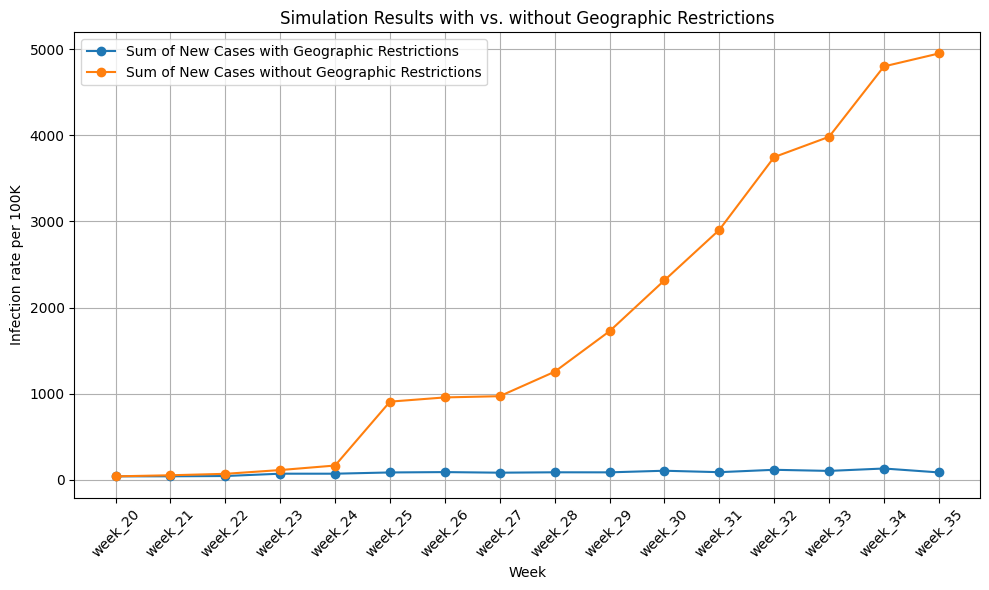

In [46]:
#@title graph
import matplotlib.pyplot as plt

# combining results_df
# Merge the two dataframes on the 'Week' column
merged_df = pd.merge(results_df_withR, results_df_withoutR, on='Week')


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Week'], merged_df['Sum of New Cases withR'], marker='o', linestyle='-', label='Sum of New Cases with Geographic Restrictions')
plt.plot(merged_df['Week'], merged_df['Sum of New Cases withoutR'], marker='o', linestyle='-', label='Sum of New Cases without Geographic Restrictions')

plt.xlabel('Week')
plt.ylabel('Infection rate per 100K')
plt.title('Simulation Results with vs. without Geographic Restrictions')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [47]:
merged_df.to_excel('/content/drive/MyDrive/SP/simulation results/Simulation results_with_NS_by_week_19disavg_20241112.xlsx', index=True)
merged_df

,Week,Sum of New Cases withR,Sum of New Cases withoutR
0,week_20,40.195160,40.195160
1,week_21,40.904715,52.830068
2,week_22,44.123944,69.620970
3,week_23,71.111911,113.334573
4,week_24,71.020298,165.930763
5,week_25,85.520092,907.413289
6,week_26,89.660586,956.462351
7,week_27,82.822884,970.732623
8,week_28,87.293886,1254.403899
9,week_29,86.743285,1724.660511


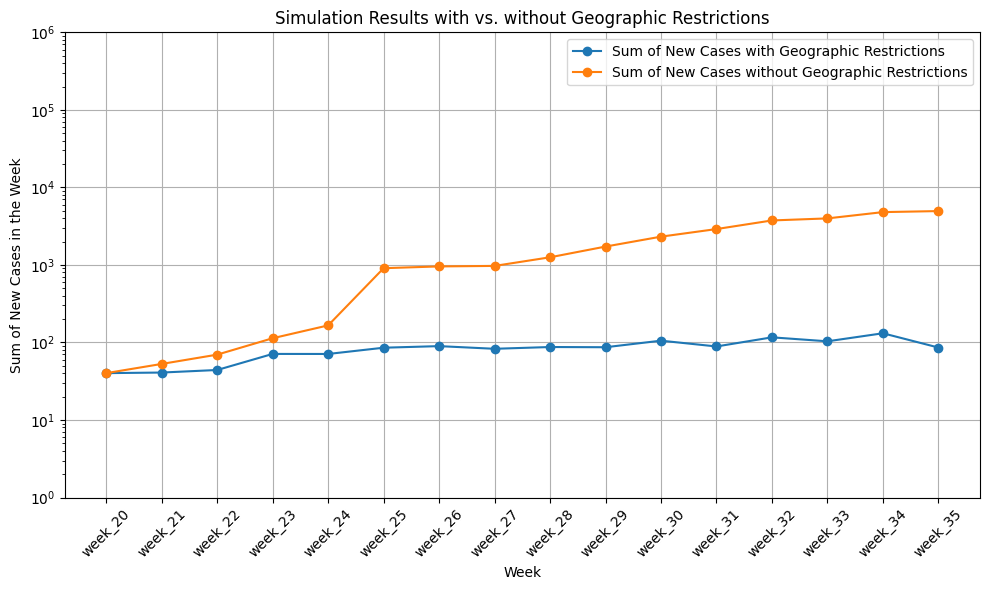

In [48]:
#@title Plotting with a logarithmic scale
plt.figure(figsize = (10,6))
plt.plot(merged_df['Week'], merged_df['Sum of New Cases withR'], marker = 'o', linestyle = '-', label = 'Sum of New Cases with Geographic Restrictions')
plt.plot(merged_df['Week'], merged_df['Sum of New Cases withoutR'], marker = 'o', linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases in the Week')
plt.title('Simulation Results with vs. without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
real_case = pd.read_excel("/content/drive/MyDrive/SP/weekly new cases Seoul.xlsx")

In [50]:
real_case.rename(columns = {'Sum of New Cases withR': 'Real New Cases withR'}, inplace = True)
real_case.head()

,week,Real New Cases withR
0,week_20,30
1,week_21,87
2,week_22,113
3,week_23,127
4,week_24,98


In [51]:
merged_df = pd.merge(merged_df, real_case, left_on='Week', right_on = 'week')

In [52]:
merged_df.drop(['week'], axis = 1, inplace = True)

In [53]:
population

,gu,population
dong,,
강북구미아동,강북구,22723
강북구번1동,강북구,19441
강북구번2동,강북구,16544
강북구번3동,강북구,17605
강북구삼각산동,강북구,32118
...,...,...
중구중림동,중구,12801
중구청구동,중구,14281
중구필동,중구,4754


In [54]:
total_population = population['population'].sum()
total_population

9894684

In [ ]:
# merged_df['Real New Cases withR'] = (merged_df['Real New Cases withR']/total_population)*100000

In [55]:
merged_df

,Week,Sum of New Cases withR,Sum of New Cases withoutR,Real New Cases withR
0,week_20,40.195160,40.195160,30
1,week_21,40.904715,52.830068,87
2,week_22,44.123944,69.620970,113
3,week_23,71.111911,113.334573,127
4,week_24,71.020298,165.930763,98
5,week_25,85.520092,907.413289,77
6,week_26,89.660586,956.462351,67
7,week_27,82.822884,970.732623,43
8,week_28,87.293886,1254.403899,57
9,week_29,86.743285,1724.660511,88


In [57]:
merged_df.to_excel("/content/drive/MyDrive/SP/Simulation_1122/merged_df_newcases.xlsx")

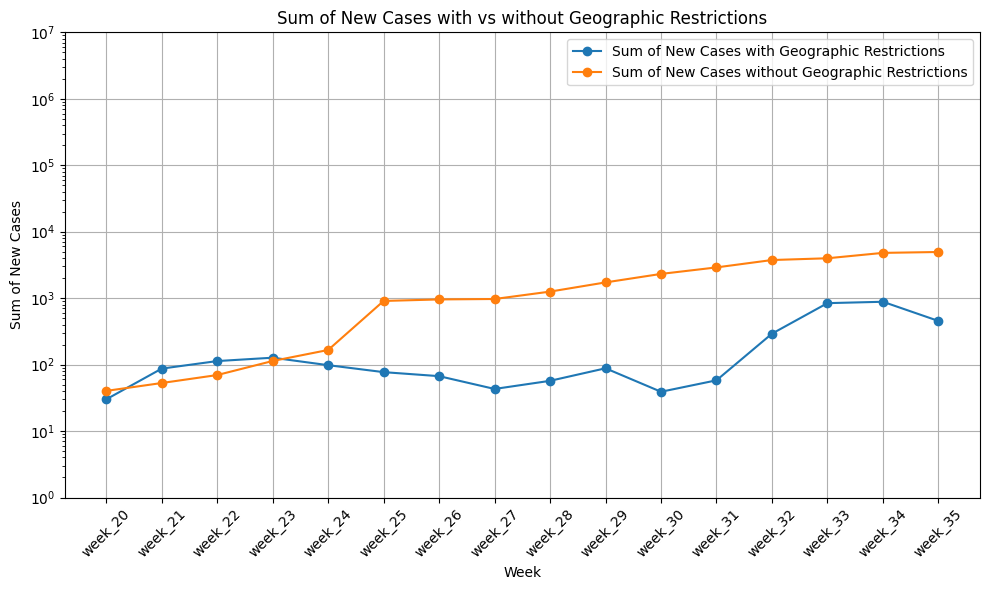

In [56]:
#@title Plotting Real Case Trend with a logarithmic scale
# Merge the two dataframes on the 'Week' column
plt.figure(figsize = (10,6))
plt.plot(merged_df['Week'], merged_df['Real New Cases withR'], marker = 'o', linestyle = '-', label = 'Sum of New Cases with Geographic Restrictions')
plt.plot(merged_df['Week'], merged_df['Sum of New Cases withoutR'], marker = 'o', linestyle = '-', label = 'Sum of New Cases without Geographic Restrictions')
plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases with vs without Geographic Restrictions')
plt.yscale('log') # Set y-axis to lagrithmic scale
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])  # Set custom y-axis ticks
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()